In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
hr_df = pd.read_csv("E:/Desktop/afame/HR Data.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Cleansing

In [22]:
# Droping Unnecessary columns

unnecessary_columns = ['EmployeeCount', 'Over18', 'StandardHours']
hr_df = hr_df.drop(columns=unnecessary_columns)

# Reasoning
# Employee Count: Contains a constant values (1) throughout the whole column

# Over18 : Indicates if the employee is over the age of 18 or not
# but in most cases employees are assummed to be adults

# StandardHours : This likely indicates total working hour of for the week, 
# in our case (80) which is again a constant values in the whole column hence unnecessary

In [23]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


# Renaming columns 

In [24]:
renamed_columns = {
    'DistanceFromHome':'TravelDistance',
    'DailyRate':'DailyWages',
    'MonthlyRate':'MonthlySalary',
    'TrainingTimesLastYear':'TrainingPeriodLastYear',
    'JobSatisfaction':'careercontentment',
    'HourlyRate':'HourlyWage'
}

hr_df = hr_df.rename(columns=renamed_columns)
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyWages                1470 non-null   int64 
 4   Department                1470 non-null   object
 5   TravelDistance            1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyWage                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

# Eliminating Redundant Entries

In [25]:
# Check for duplicate rows
duplicate_rows = hr_df.duplicated()

In [26]:
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# Sanatizing appropriate columns

In [27]:
# Check unique values in each column
print("Unique values in BusinessTravel:", hr_df['BusinessTravel'].unique())
print("Unique values in EducationField:", hr_df['EducationField'].unique())
print("Unique values in JobRole:", hr_df['JobRole'].unique())
print("Unique values in MaritalStatus:", hr_df['MaritalStatus'].unique())
print("Unique values in Department:", hr_df['Department'].unique())

Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']


In [28]:
# Standardize values
# str.low(): This transforms all the letters or unique values into lower case ensuring consistency
# str.strip(): Removes leading and trailing whitespaces

hr_df['BusinessTravel'] = hr_df['BusinessTravel'].str.lower().str.strip()
hr_df['EducationField'] = hr_df['EducationField'].str.lower().str.strip()
hr_df['JobRole'] = hr_df['JobRole'].str.lower().str.strip()
hr_df['MaritalStatus'] = hr_df['MaritalStatus'].str.lower().str.strip()
hr_df['Department'] = hr_df['Department'].str.lower().str.strip()

In [29]:
print("Unique values in BusinessTravel:", hr_df['BusinessTravel'].unique())
print("Unique values in EducationField:", hr_df['EducationField'].unique())
print("Unique values in JobRole:", hr_df['JobRole'].unique())
print("Unique values in MaritalStatus:", hr_df['MaritalStatus'].unique())
print("Unique values in Department:", hr_df['Department'].unique())

# Rechecking unique values 

Unique values in BusinessTravel: ['travel_rarely' 'travel_frequently' 'non-travel']
Unique values in EducationField: ['life sciences' 'other' 'medical' 'marketing' 'technical degree'
 'human resources']
Unique values in JobRole: ['sales executive' 'research scientist' 'laboratory technician'
 'manufacturing director' 'healthcare representative' 'manager'
 'sales representative' 'research director' 'human resources']
Unique values in MaritalStatus: ['single' 'married' 'divorced']
Unique values in Department: ['sales' 'research & development' 'human resources']


# Handelling Null Values

In [30]:
# Identify columns with missing values
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyWages                  0
Department                  0
TravelDistance              0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyWage                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
careercontentment           0
MaritalStatus               0
MonthlyIncome               0
MonthlySalary               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingPeriodLastYear      0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Additional Steps

### Job Satisfaction

C:\Users\ojasw\AppData\Local\Temp\ipykernel_16548\45448112.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hr_df['careercontentment'], shade=True, color='blue')
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


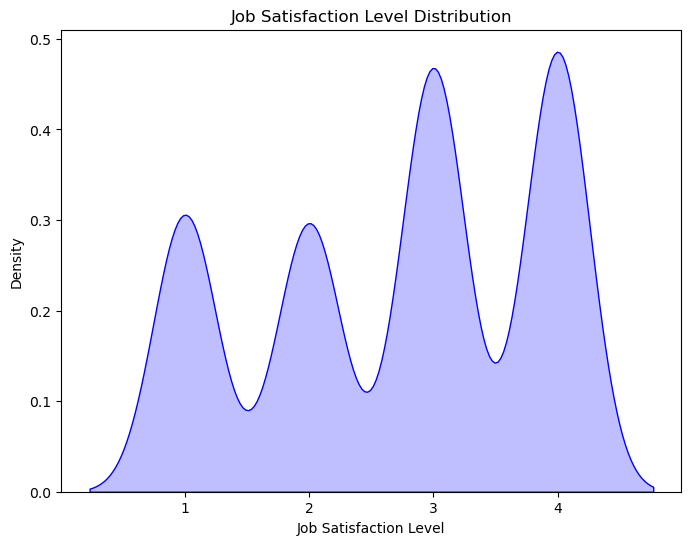

In [33]:
# Job satisfaction level distribution
career_contentment_counts = hr_df['careercontentment'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.kdeplot(hr_df['careercontentment'], shade=True, color='blue')
plt.title('Job Satisfaction Level Distribution')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Density')
plt.show()

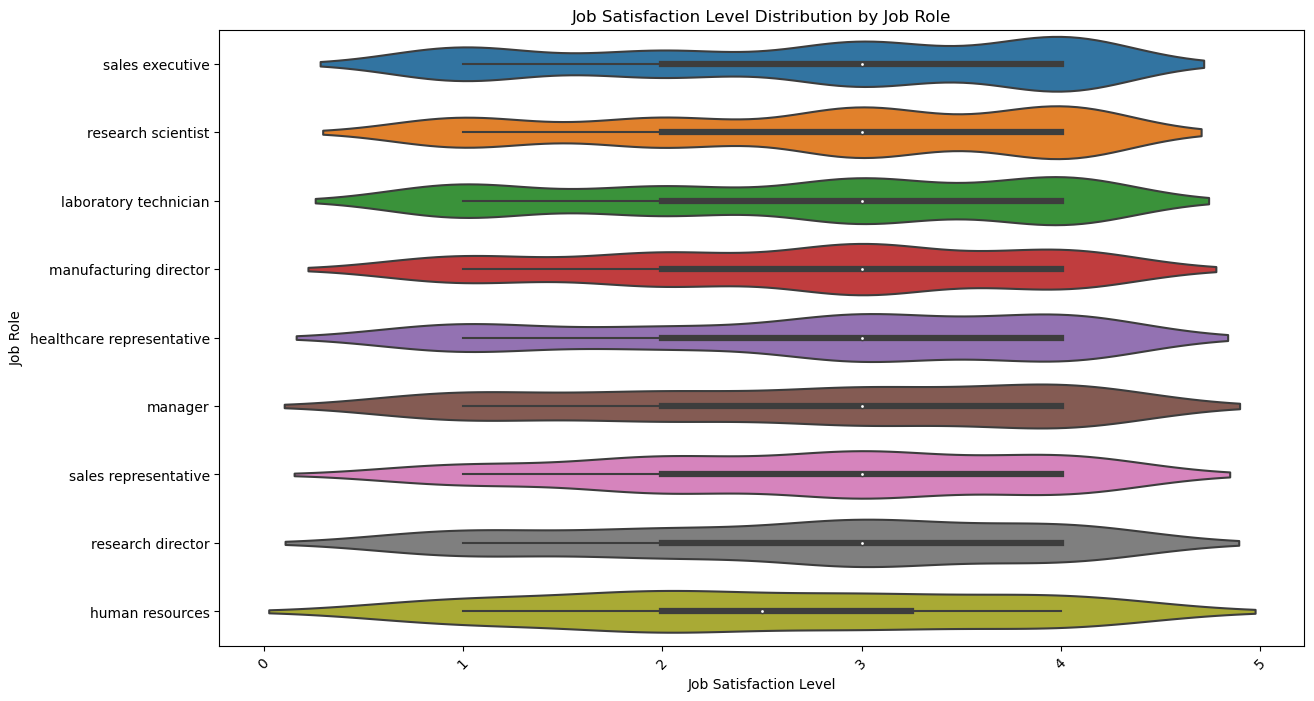

In [34]:
# Job satisfaction level distribution by job role
plt.figure(figsize=(14, 8))
sns.violinplot(data=hr_df, x='careercontentment', y='JobRole')
plt.title('Job Satisfaction Level Distribution by Job Role')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Job Role')
plt.xticks(rotation=45)
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 

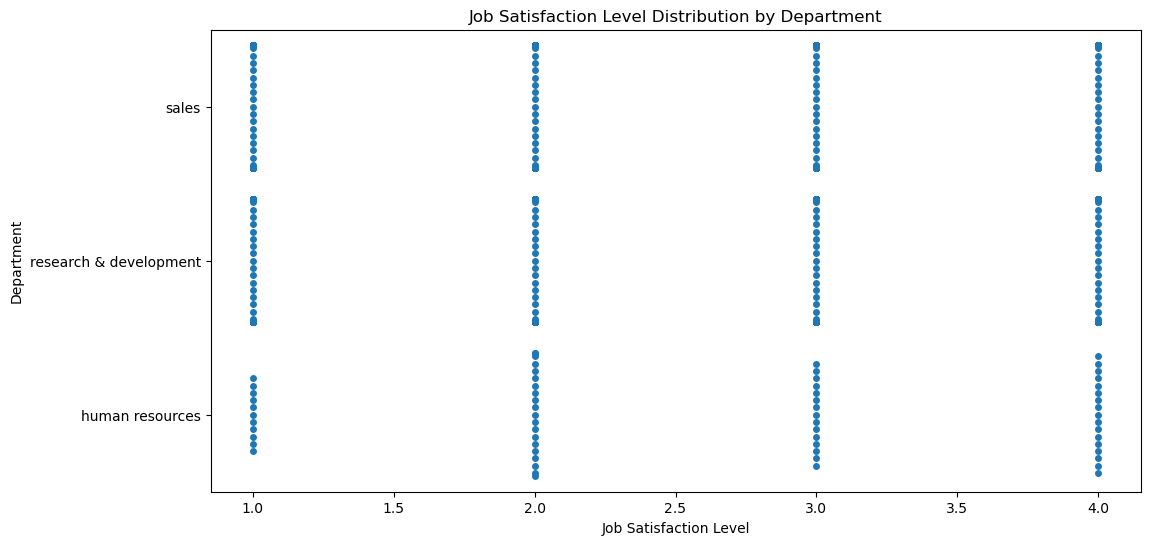

In [36]:
# Job satisfaction level distribution by department
plt.figure(figsize=(12, 6))
sns.swarmplot(data=hr_df, x='careercontentment', y='Department')
plt.title('Job Satisfaction Level Distribution by Department')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Department')
plt.show()

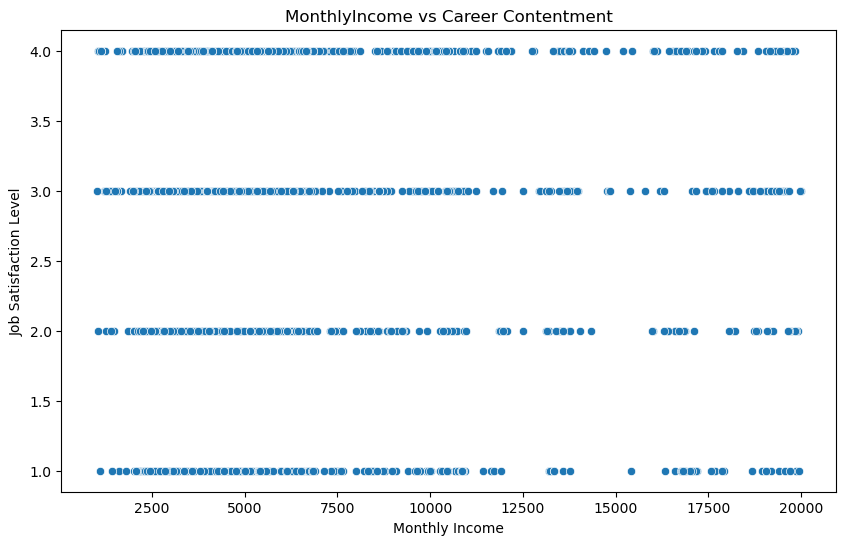

Correlation coefficient between MonthlyIncome and JobSatisfactionLevel: -0.007156742355912683


In [37]:
# Scatter plot of MonthlyIncome vs JobSatisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hr_df, x='MonthlyIncome', y='careercontentment')
plt.title('MonthlyIncome vs Career Contentment')
plt.xlabel('Monthly Income')
plt.ylabel('Job Satisfaction Level')
plt.show()

# Calculate correlation coefficient between MonthlyIncome and JobSatisfaction
correlation_coefficient = hr_df['MonthlyIncome'].corr(hr_df['careercontentment'])
print("Correlation coefficient between MonthlyIncome and JobSatisfactionLevel:", correlation_coefficient)

In [53]:
# "The correlation coefficient tells us how much two things are related. When we looked at the
# relationship between monthly income and job satisfaction level, we found a number close to zero.
# (-0.007156) That means there's almost no connection between how much someone earns and how satisfied they are with their job.

### Attrition analysis

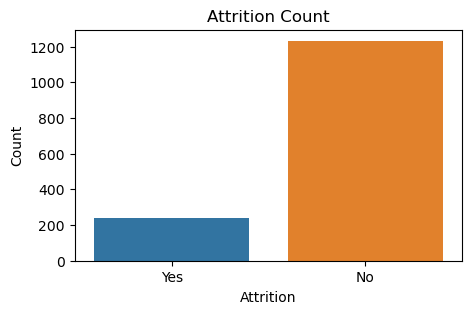

In [38]:
plt.figure(figsize=(5, 3))
sns.countplot(data=hr_df, x='Attrition')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### Salary Analysis

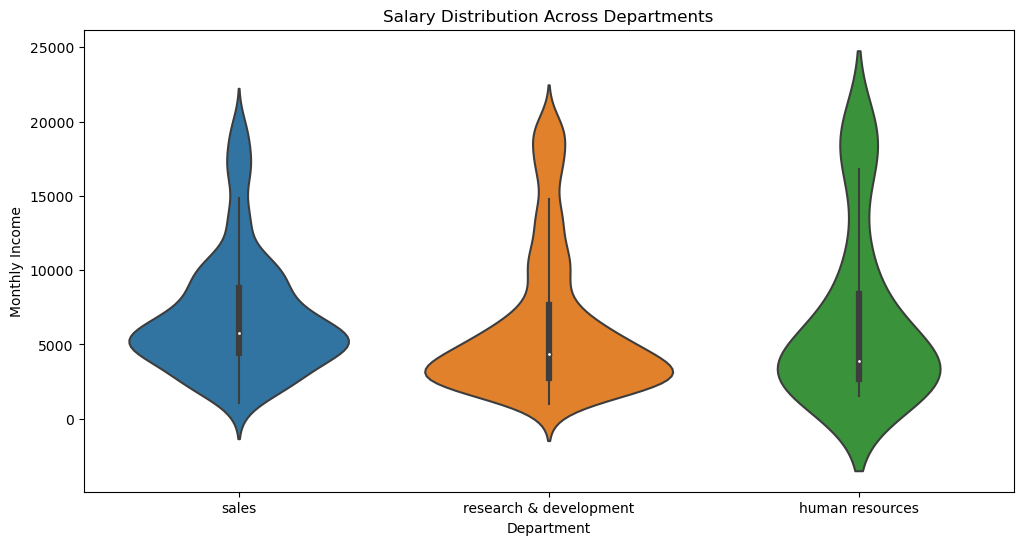

In [39]:
# Salary distribution across departments
plt.figure(figsize=(12, 6))
sns.violinplot(data=hr_df, x='Department', y='MonthlyIncome')
plt.title('Salary Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()

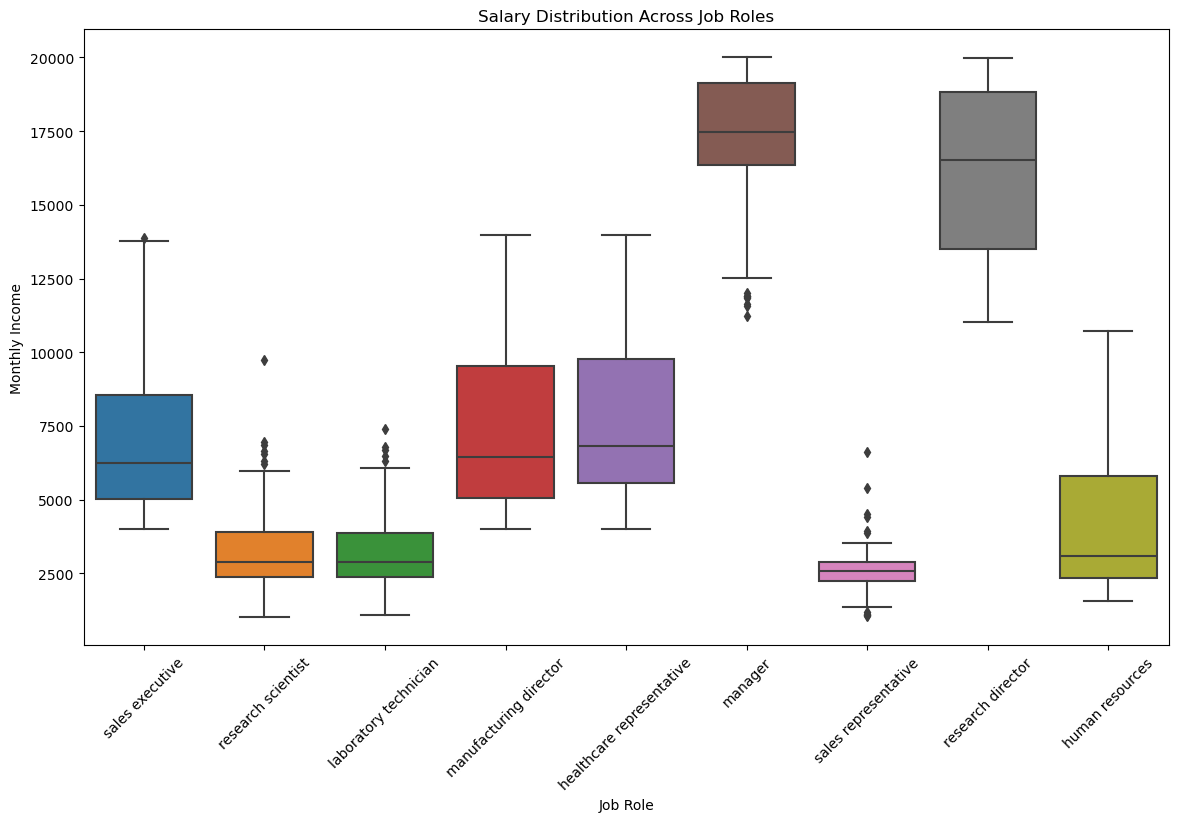

In [40]:
# Salary distribution across job roles
plt.figure(figsize=(14, 8))
sns.boxplot(data=hr_df, x='JobRole', y='MonthlyIncome')
plt.title('Salary Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

### Employee Demographics

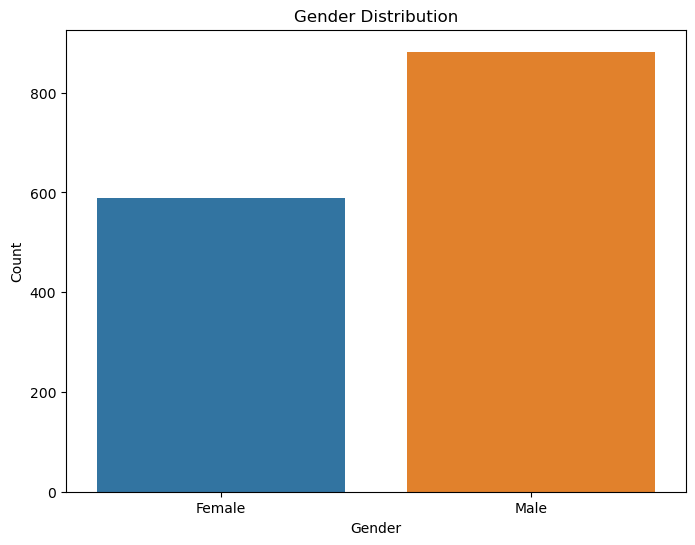

In [66]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

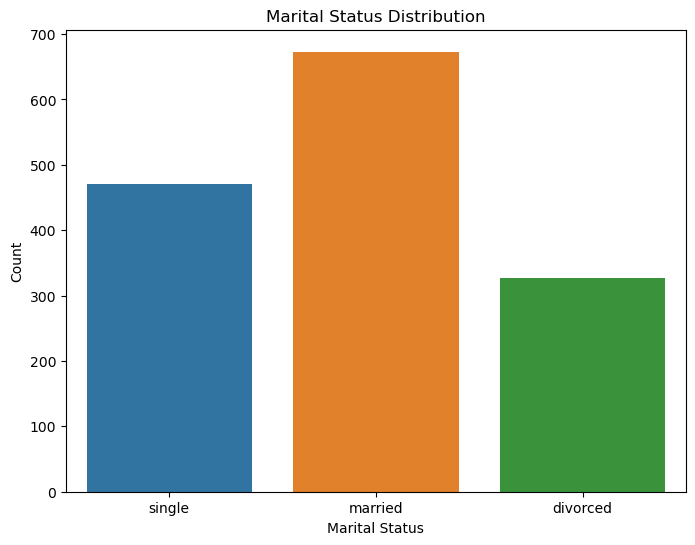

In [68]:
# Marital status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_df, x='MaritalStatus')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()